### titanic 생존자 데이터셋 분석

In [23]:
import seaborn as sb
import pandas as pd
import numpy as np


titanic = sb.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [5]:
# 성별 평균 생존율
titanic.pivot_table('survived','sex',aggfunc='mean')

# pivot_table(
#     values=None,
#     index=None,
#     columns=None,
#     aggfunc='mean',
#     fill_value=None,
#     margins=False,
#     dropna=True,
#     margins_name='All',
#     observed=False,
# )

,survived
sex,
female,0.742038
male,0.188908


In [7]:
# 'pclass' 별 평균 생존율

titanic.pivot_table('survived','pclass',aggfunc='mean')

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [11]:
# 'embark_town' 별 평균 생존율

titanic.pivot_table('survived','embark_town',aggfunc='mean')

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [13]:
# 'class', 'sibsp' 를 MultiIndex로 group화 하고 컬럼을 'sex'로 하는 생존율(평균)
titanic.pivot_table('survived',index=['class','sibsp'],columns='sex',aggfunc='mean')

sex             female      male
class  sibsp                    
First  0      0.979592  0.329545
       1      0.950000  0.483871
       2      1.000000  0.500000
       3      1.000000  0.000000
Second 0      0.931818  0.118421
       1      0.892857  0.259259
       2      1.000000  0.200000
       3      1.000000       NaN
Third  0      0.592593  0.129630
       1      0.447368  0.222222
       2      0.571429  0.125000
       3      0.125000  0.000000
       4      0.333333  0.083333
       5      0.000000  0.000000
       8      0.000000  0.000000

In [25]:
# 'age'로 등급별 생존율 구하기
titanic['age'].min()  # 0.42
titanic['age'].max()  # 0.80
titanic['age'].mean() # 29.69

#titanic.pivot_table('survived','age',aggfunc='mean')

# 'age'를 5단계로 출력
pd.qcut(titanic.age,5)  # titanic.age 는 titanic['age']와 동일

#  [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]
# 'child'            'young'          'middle'        'old'      'very old'

0       (19.0, 25.0]
1       (31.8, 41.0]
2       (25.0, 31.8]
3       (31.8, 41.0]
4       (31.8, 41.0]
           ...      
886     (25.0, 31.8]
887    (0.419, 19.0]
888              NaN
889     (25.0, 31.8]
890     (31.8, 41.0]
Name: age, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.419, 19.0] < (19.0, 25.0] < (25.0, 31.8] < (31.8, 41.0] < (41.0, 80.0]]

In [27]:
titanic['age_class']=pd.qcut(titanic.age,5,
                             labels=['child', 'young','middle','old','very old'])
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle


In [29]:
# 'age_class', 5단계 연령 등급별 생존율
titanic.pivot_table('survived','age_class',aggfunc='mean')

,survived
age_class,
child,0.481707
young,0.328467
middle,0.393701
old,0.437500
very old,0.373239


In [31]:
# 'sex','age_class' 를 MultiIndex로 한 평균 생존율
titanic.pivot_table('survived',index=['sex','age_class'],aggfunc='mean')

survived
sex    age_class          
female child      0.706667
       young      0.723404
       middle     0.727273
       old        0.843137
       very old   0.795455
male   child      0.292135
       young      0.122222
       middle     0.216867
       old        0.215054
       very old   0.183673

In [32]:
# 분포의 갯수
titanic['age_class'].value_counts()

child       164
old         144
very old    142
young       137
middle      127
Name: age_class, dtype: int64

In [35]:
# Series 객체의 quantile()함수 : 데이터의 백분위수
titanic['age'].quantile([0,.2,.4,.6,.8,1.0])

0.0     0.42
0.2    19.00
0.4    25.00
0.6    31.80
0.8    41.00
1.0    80.00
Name: age, dtype: float64

28.0

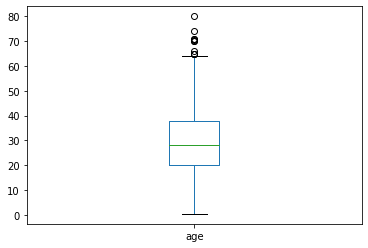

In [37]:
# 사분위수 시각화 : box plot
titanic['age'].plot.box()
titanic['age'].median()

In [45]:
# qcut()을 사용하여 fare 를 3단계로 분류된 'fare_class'컬럼을 추가
# label : 'First','Second','Third'
# 'class'를 복사하여 새로운 컬럼 'class2'로 추가하고 결과를 비교
# 'fare_class', 3단계 요금 등급별 생존율을 구하기

titanic['fare_class']=pd.qcut(titanic.fare,3,
                             labels=['Third','Second','First'])
titanic['class2'] = titanic['class']

titanic.pivot_table('survived','fare_class',aggfunc='mean')


,survived
fare_class,
Third,0.198052
Second,0.402778
First,0.559322


In [41]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_class,fare_class,class2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young,First,Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,old,Third,First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,middle,Second,Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,old,Third,First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,old,Third,Third
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,middle,Second,Second
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,child,First,First
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,NaN,Third
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,middle,Second,First


In [47]:
# 생존한 사람중에서 'fare_class'가 'third'인 사람이 몇명인지 구하기
sv_df = titanic[titanic['survived'] == 1]
sv_df['fare_class'].value_counts()           # 61

First     165
Second    116
Third      61
Name: fare_class, dtype: int64

In [48]:
# 컬럼을 중간에 삽입하는 방법
df= titanic.copy()


In [49]:
# 상관 관계(Correlation): 피쳐(x값,독립변수),Y값(종속변수,레이블)
titanic.corr()  # 상관 계수 : (-1 ~ 1), 0 이 가장 작은값, 0.5이상이면 상관관계가 크다


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


### 날짜 다루기 : pd.to_datatime(['2020-07-24'])

In [52]:
# POSIX 시간 표기법 :1970년 1월 1일(1677~2262)
pd.date_range('9/22/1677',periods=4,freq='D')

DatetimeIndex(['1677-09-22', '1677-09-23', '1677-09-24', '1677-09-25'], dtype='datetime64[ns]', freq='D')

In [51]:
import time
time.time()

1595577451.491733

In [56]:
date1 = '2020-07-24'       # '-', '/' , ',', '.', ':'
date2 = '2020/07/24'
type(date1)
d1 = pd.to_datetime([date1])
d2 = pd.to_datetime([date2])
# date2 - date1   #TypeError
print(d2 - d1)    # TimedeltaIndex 객체, 날짜 단위로 연산이 가능

TimedeltaIndex(['0 days'], dtype='timedelta64[ns]', freq=None)


### 엑셀 파일 읽고 쓰기
#### pd.read_excel()
#### df.to_excel()

In [64]:
# 읽기
df = pd.read_excel('excel_exam.xlsx',index_col='id')
type(df)   # DataFrame
df2 = df.drop(['class'],axis=1) # 열을 삭제
df2

df['total'] = df2.sum(axis=1)          # 열방향, 각 행의 합을 구함
df['mean'] = round(df2.mean(axis=1),2)  # 수소점 두자리로 반올림
df

# 쓰기
df.to_excel('new_exam.xlsx',index=True)

In [86]:
# 데이터 프레임 정렬, 새로운 컬럼 추가
df = pd.read_excel('excel_exam.xlsx',index_col='id')
df['총점'] = df['math'] + df['english'] + df['science']
df['평균'] = round((df['math'] + df['english'] + df['science'])/3,2)

# 평균이 75점 보다 큰 행을 추출
df_75 = df[df['평균'] > 75]
df_75         

df =df.sort_values(by='평균',ascending=True) # 오름차순
df
df =df.sort_values(by='평균',ascending=False) # 내림차순
df

df['합격'] = '0'
df2 = df[df['평균'] >= 70] # 합격자
df3 = df[df['평균'] < 70] # 불합격자
df2.loc[:,'합격'] = 'pass'
df2

df3.loc[:,'합격'] = 'Fail'
df3

result = df2.append(df3)
result

C:\anaconda\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,class,math,english,science,총점,평균,합격
id,,,,,,,
18,5,80,78,90,248,82.67,pass
19,5,89,68,87,244,81.33,pass
6,2,50,89,98,237,79.00,pass
17,5,65,68,98,231,77.00,pass
16,4,58,98,65,221,73.67,pass
20,5,78,83,58,219,73.00,pass
2,1,60,97,60,217,72.33,pass
7,2,80,90,45,215,71.67,pass
15,4,75,56,78,209,69.67,Fail


In [93]:
# chained assignment : copy본이 만들어 지면서 동시에 인덱싱으로 쓰기 시도시 발생
# SettingWithCopyWarning : get() --> set()
df = pd.DataFrame({'a' : [1,2,3],
                   'b' : ['one','two','three']})
print(df)

# SettingWithCopyWarning 메세지 출력 옵션 설정
#pd.set_option('mode.chained_assignment','wanr') #SettingWithCopyWarning
pd.set_option('mode.chained_assignment','raise') # SettingWithCopyWarning 오류처리

# df['a'][0] = 40     # SettingWithCopyWarning, get() --> set(),사본 생성, 요ㅗ변경
df.loc[0,'a'] = 50  # set() , 사본이 생성되지 않는다, 원본이 변경
df

   a      b
0  1    one
1  2    two
2  3  three


,a,b
0,50,one
1,2,two
2,3,three
